In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score

## 知識情報学第10回演習サンプルプログラム ex10.ipynb
- Checked with Python 3.8.16, scikit-learn 1.3
- Last updated: 2023/12/12
- MIT License

## K-means法によるWineデータのクラスタリング

In [8]:
# scikit-learnのデータセットからwineデータを読み込み
wine = datasets.load_wine()

In [9]:
# 2次元に限定
d1 = wine.feature_names.index('alcohol')
d2 = wine.feature_names.index('malic_acid')
X = scale(wine.data[:, [d1, d2]])
y = wine.target

#特徴量の名称
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### K-meansクラスタリングの実行
- [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- 【課題2】クラスタリング結果を考察してみましょう．
   - それぞれの指標の特徴を可視化結果と共に考察すると良いです．

In [29]:
km = KMeans(n_clusters=3, init="k-means++", n_init=50)
km.fit(X)

KMeans(n_clusters=3, n_init=50)

### 【課題1(a)】DecisionBoundaryDisplayを利用してクラスタリング結果をクラスタ中心と共にプロット．

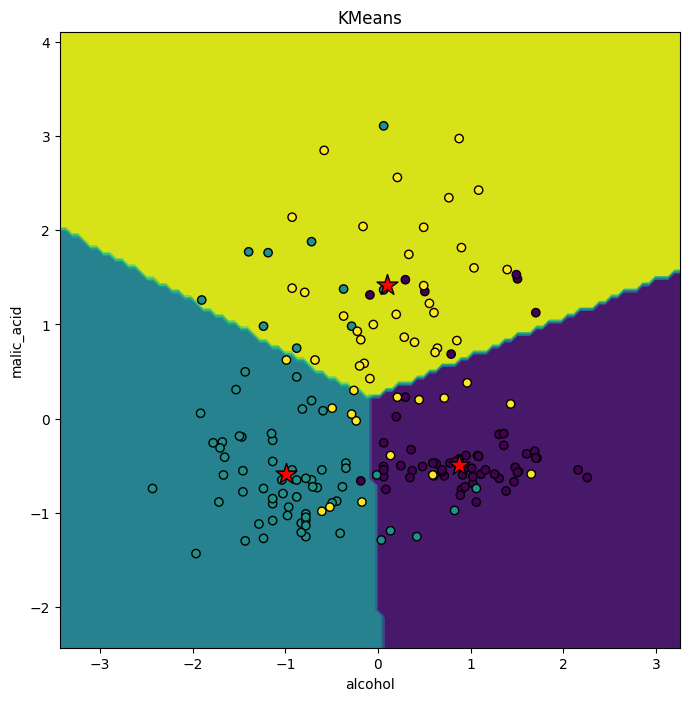

In [31]:
# DecisionBoundaryDisplayでクラスタリング結果をクラスタごとに色分けして表示
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel(wine.feature_names[d1])
ax.set_ylabel(wine.feature_names[d2])
ax.set_title("KMeans")
DecisionBoundaryDisplay.from_estimator(km, X, ax=ax)
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='k')
plt.show()

### 【課題1(b)】クラスタ数を変えて内部基準SSE，平均シルエット係数，Rand scoreをそれぞれグラフにプロット．
- 横軸クラスタ数，縦軸SSE/平均シルエット係数/Rand_score
- ヒント：SSEはscikit-learnのKMeansクラスの内部変数に定義されている．ただし名称は異なる．
- [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
- [rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html)

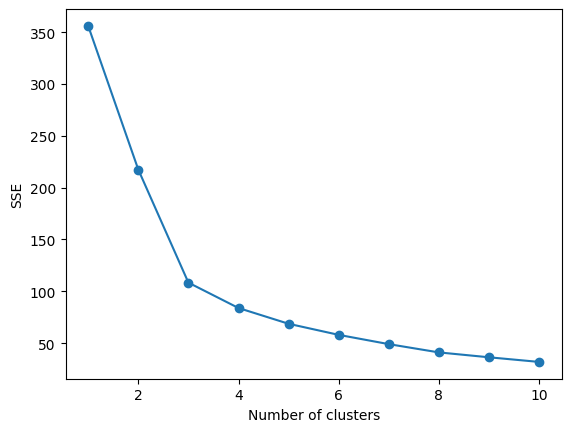

In [20]:
# SSE
sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=50)
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#### 課題2-1 SSEの考察
- クラス多数は2->3で大きく減少しているが、その後クラスタ数が増えてもSSEの減少幅が小さくなっていることから、クラスタ数3がもっとも適切なクラス多数だと言える
- 課題1-aの可視化結果からも直感的にクラスタ数3は妥当に思える

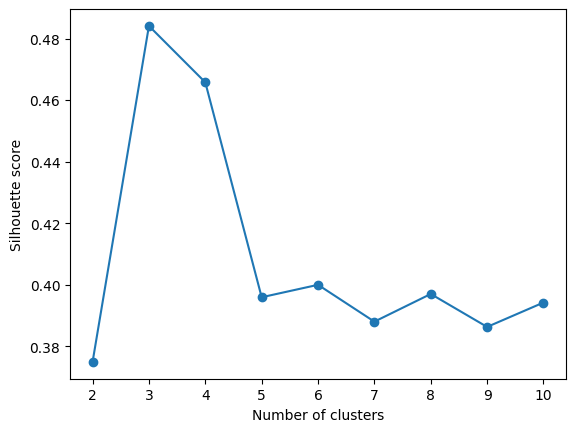

In [21]:
# 平均シルエット係数
silhouette_avgs = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=50)
    km.fit(X)
    silhouette_avgs.append(silhouette_score(X, km.labels_))
plt.plot(range(2, 11), silhouette_avgs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

### 課題2-2 平均シルエット係数の考察
- クラスタ数3でもっともスコアが高くなっており、SSEによる評価と結果が一致した
- クラスタ数5以上では必要以上の数のクラスタに分割してしまっていることで、他のクラスタ内のデータとの距離が近くなってスコアが低くなっていると理解できる

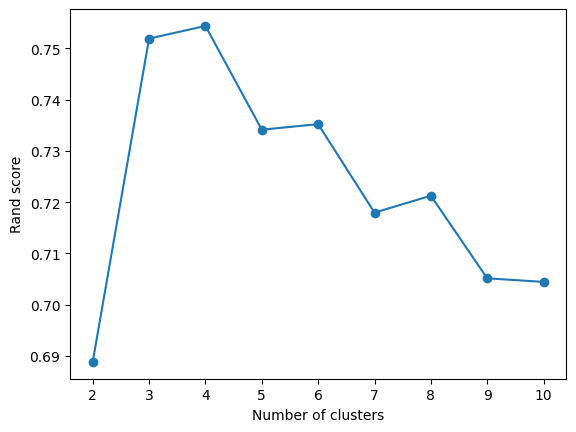

In [22]:
# Rand score
rand_scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=50)
    km.fit(X)
    rand_scores.append(rand_score(y, km.labels_))
plt.plot(range(2, 11), rand_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Rand score')
plt.show()

#### 課題2-3 Rand-scoreの考察
- Rnad-scoreが特に高い3,4が最適なクラスタ数だと言える。
- クラスタ数が偶数の場合にscoreが高くなる傾向が見られる。原因は不明だが、もしデータセットの特性によりクラスタ数が偶数の場合に不正にscoreが高くなってしまうとすれば、他の指標と同様にクラスタ数3が最適だと言える
- SSEや平均シルエット係数、データのプロットを見た直感ではクラスタ数3がもっとも適しているように見えるが、もしRand-scoreだけで評価していた場合はクラスタ数4がもっとも適していると判断してしまうため、複数の指標で評価することの重要性が理解できた